In [ ]:
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


plt.rcParams['axes.edgecolor'] = 'blue'
plt.rcParams['figure.figsize'] = [14, 7]

# EDA

In [23]:
df_rrs = pd.read_csv("../data/processed/rrs_data.csv", index_col=0)

In [24]:
df_rrs.describe()

,B2,B3,B4,B5,B6,B7,B8,B8A,CHL
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,0.116606,0.106901,0.097058,0.100086,0.095036,0.093612,0.092786,0.090583,1.428538
std,0.188522,0.178729,0.175164,0.184301,0.176483,0.173927,0.175168,0.169588,0.699061
min,0.005800,0.006100,0.000300,0.000100,0.000100,0.000100,0.000100,0.000100,0.160000
25%,0.018950,0.012650,0.005900,0.005200,0.003950,0.004450,0.003500,0.003300,0.890000
50%,0.027500,0.023800,0.014200,0.014100,0.013200,0.013600,0.012800,0.011900,1.311279
75%,0.097850,0.088300,0.081450,0.087650,0.082200,0.078300,0.075300,0.075000,1.915000
max,0.855000,0.808200,0.802600,0.867800,0.840600,0.838400,0.843000,0.826300,3.140000


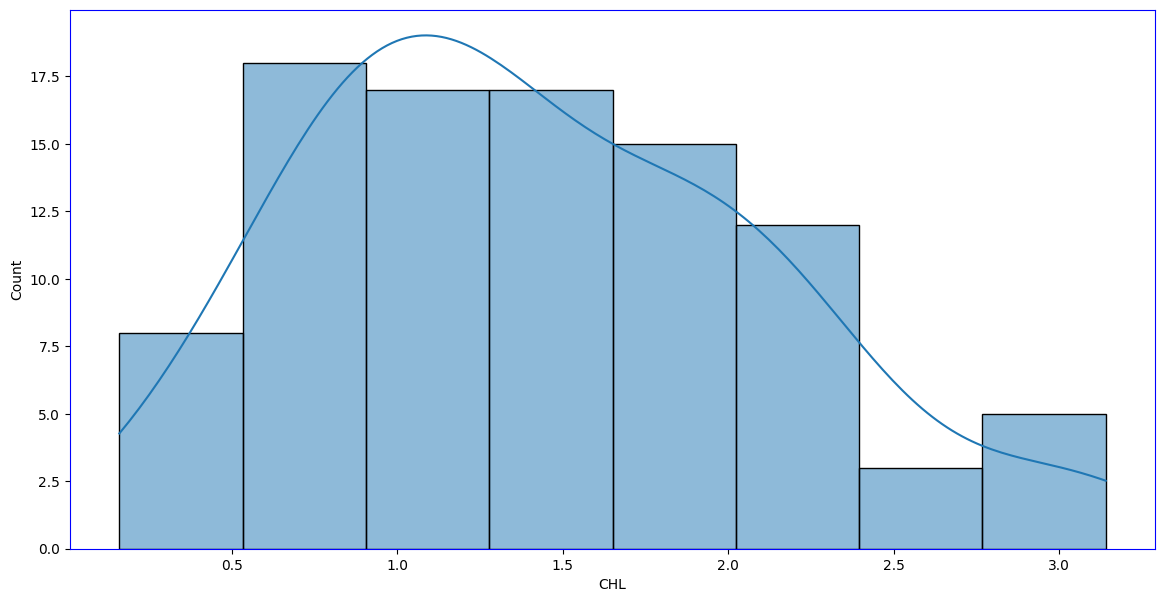

In [7]:
sns.histplot(df_rrs['CHL'], kde=True);

Пробы на мезотрофном участке (хл-а > 3 мкг/л)

In [25]:
df_rrs[df_rrs['CHL'] > df_rrs['CHL'].quantile(0.97)].sort_values('CHL')

,B2,B3,B4,B5,B6,B7,B8,B8A,CHL
50,0.0137,0.0098,0.0035,0.0032,0.0027,0.0022,0.0020,0.0015,3.12
170,0.0103,0.0101,0.0028,0.0007,0.0001,0.0008,0.0003,0.0001,3.13
97,0.0293,0.0253,0.0154,0.0166,0.0141,0.0146,0.0134,0.0134,3.14


In [26]:
df_rrs = df_rrs[df_rrs['CHL'] < df_rrs['CHL'].quantile(0.97)]

## Добавление новых признаков

In [28]:
df_rrs_suppl = copy.copy(df_rrs)

In [29]:
df_rrs_suppl['Ratio B5/B4'] = df_rrs['B5'] / df_rrs['B4']
df_rrs_suppl['NIRRI'] = df_rrs['B8A'] / df_rrs['B4']
df_rrs_suppl['NDCI'] = (1/df_rrs['B5'] - 1/df_rrs['B4']) / (1/df_rrs['B5'] + 1/df_rrs['B4'])
df_rrs_suppl['BGI'] = df_rrs['B2'] / df_rrs['B3']
df_rrs_suppl['GNDVI'] = (df_rrs['B7'] - df_rrs['B3']) / (df_rrs['B7'] + df_rrs['B3'])
df_rrs_suppl['NDTI'] = (df_rrs['B4'] - df_rrs['B3']) / (df_rrs['B4'] + df_rrs['B3'])
df_rrs_suppl['NRDCI'] = (df_rrs['B5'] - df_rrs['B4']) / (df_rrs['B5'] + df_rrs['B4'])
df_rrs_suppl['Ratio B3/B8'] = df_rrs['B3'] / df_rrs['B8']
df_rrs_suppl['Ratio B3/B8A'] = df_rrs['B3'] / df_rrs['B8A']

In [30]:
df_rrs_suppl.describe()

,B2,B3,B4,B5,B6,B7,B8,B8A,CHL,Ratio B5/B4,NIRRI,NDCI,BGI,GNDVI,NDTI,NRDCI,Ratio B3/B8,Ratio B3/B8A
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,0.119829,0.109896,0.099987,0.103127,0.097951,0.096473,0.095641,0.093374,1.373056,0.940882,0.771629,0.039353,1.240109,-0.310110,-0.238606,-0.039353,4.482202,5.575629
std,0.190729,0.180855,0.177251,0.186518,0.178605,0.176024,0.177294,0.171632,0.637372,0.165089,0.268092,0.107607,0.264158,0.258062,0.200873,0.107607,13.188649,15.925954
min,0.005800,0.006100,0.000300,0.000100,0.000100,0.000100,0.000100,0.000100,0.160000,0.240000,0.040000,-0.125000,0.756522,-0.980952,-0.925000,-0.612903,0.935811,0.681058
25%,0.019650,0.013775,0.006150,0.005375,0.004150,0.004575,0.003750,0.003375,0.890000,0.869011,0.614180,-0.019678,1.057776,-0.532923,-0.368681,-0.070085,1.195610,1.214415
50%,0.028200,0.024500,0.014600,0.014250,0.013650,0.013700,0.012900,0.012200,1.285000,0.983160,0.814243,0.008492,1.169777,-0.252256,-0.228068,-0.008492,1.835259,1.797286
75%,0.111125,0.097050,0.087675,0.094825,0.089650,0.085750,0.082675,0.080925,1.865258,1.040146,0.932521,0.070085,1.332927,-0.092141,-0.060006,0.019678,3.673428,3.706609
max,0.855000,0.808200,0.802600,0.867800,0.840600,0.838400,0.843000,0.826300,2.880000,1.285714,1.935484,0.612903,2.217391,0.160892,0.083095,0.125000,104.000000,104.000000


In [31]:
df_rrs_suppl.corr('spearman')

,B2,B3,B4,B5,B6,B7,B8,B8A,CHL,Ratio B5/B4,NIRRI,NDCI,BGI,GNDVI,NDTI,NRDCI,Ratio B3/B8,Ratio B3/B8A
B2,1.000000,0.981103,0.969724,0.964760,0.962819,0.959327,0.957173,0.939402,-0.065874,0.481845,0.583386,-0.481845,-0.403633,0.834855,0.883583,0.481845,-0.843193,-0.781028
B3,0.981103,1.000000,0.985029,0.979302,0.975426,0.968050,0.970489,0.958848,-0.005384,0.491983,0.611684,-0.491983,-0.514225,0.837584,0.894576,0.491983,-0.850455,-0.799034
B4,0.969724,0.985029,1.000000,0.996204,0.994509,0.988852,0.988956,0.982483,-0.020567,0.520527,0.663635,-0.520527,-0.500559,0.895338,0.948713,0.520527,-0.903715,-0.859283
B5,0.964760,0.979302,0.996204,1.000000,0.995715,0.990763,0.991010,0.986370,-0.017554,0.581845,0.686247,-0.581845,-0.499651,0.905311,0.949031,0.581845,-0.912879,-0.872780
B6,0.962819,0.975426,0.994509,0.995715,1.000000,0.991861,0.989364,0.984972,-0.030348,0.560656,0.686372,-0.560656,-0.497777,0.910804,0.951703,0.560656,-0.913594,-0.871534
B7,0.959327,0.968050,0.988852,0.990763,0.991861,1.000000,0.990740,0.986582,-0.033157,0.563486,0.705010,-0.563486,-0.487398,0.933835,0.954042,0.563486,-0.927754,-0.888743
B8,0.957173,0.970489,0.988956,0.991010,0.989364,0.990740,1.000000,0.991788,-0.018945,0.560095,0.723798,-0.560095,-0.504383,0.918460,0.951999,0.560095,-0.941988,-0.896542
B8A,0.939402,0.958848,0.982483,0.986370,0.984972,0.986582,0.991788,1.000000,-0.036001,0.581072,0.767445,-0.581072,-0.538970,0.925883,0.956061,0.581072,-0.940386,-0.919629
CHL,-0.065874,-0.005384,-0.020567,-0.017554,-0.030348,-0.033157,-0.018945,-0.036001,1.000000,-0.043430,-0.049556,0.043430,-0.144106,-0.118357,-0.084083,-0.043430,0.056200,0.082330
Ratio B5/B4,0.481845,0.491983,0.520527,0.581845,0.560656,0.563486,0.560095,0.581072,-0.043430,1.000000,0.610752,-1.000000,-0.308031,0.616917,0.550319,1.000000,-0.587617,-0.629095


In [32]:
df_rrs_suppl.corr()

,B2,B3,B4,B5,B6,B7,B8,B8A,CHL,Ratio B5/B4,NIRRI,NDCI,BGI,GNDVI,NDTI,NRDCI,Ratio B3/B8,Ratio B3/B8A
B2,1.000000,0.998948,0.995975,0.994841,0.992318,0.990093,0.993313,0.986598,-0.130172,0.310147,0.327833,-0.285862,-0.331855,0.547254,0.559673,0.285862,-0.145195,-0.157332
B3,0.998948,1.000000,0.998687,0.997588,0.995912,0.994270,0.995312,0.991353,-0.125163,0.310172,0.334830,-0.284801,-0.348180,0.550756,0.562090,0.284801,-0.141195,-0.154077
B4,0.995975,0.998687,1.000000,0.999438,0.998964,0.998143,0.996557,0.996331,-0.131219,0.312713,0.345105,-0.286445,-0.349492,0.558415,0.567109,0.286445,-0.141191,-0.154145
B5,0.994841,0.997588,0.999438,1.000000,0.999542,0.998643,0.996185,0.997061,-0.132291,0.316027,0.345430,-0.288590,-0.346660,0.555197,0.562009,0.288590,-0.139971,-0.152648
B6,0.992318,0.995912,0.998964,0.999542,1.000000,0.999669,0.996200,0.998753,-0.134014,0.315317,0.350125,-0.287867,-0.348449,0.558597,0.563727,0.287867,-0.139672,-0.152588
B7,0.990093,0.994270,0.998143,0.998643,0.999669,1.000000,0.995686,0.999541,-0.138693,0.314242,0.353081,-0.286914,-0.347965,0.559715,0.563130,0.286914,-0.139491,-0.152257
B8,0.993313,0.995312,0.996557,0.996185,0.996200,0.995686,1.000000,0.994616,-0.124273,0.305992,0.340551,-0.280033,-0.337254,0.545348,0.551940,0.280033,-0.137833,-0.149795
B8A,0.986598,0.991353,0.996331,0.997061,0.998753,0.999541,0.994616,1.000000,-0.137023,0.314248,0.359127,-0.286613,-0.350024,0.560968,0.563771,0.286613,-0.138898,-0.151912
CHL,-0.130172,-0.125163,-0.131219,-0.132291,-0.134014,-0.138693,-0.124273,-0.137023,1.000000,0.026371,-0.058902,-0.048716,-0.278318,-0.088933,-0.069274,0.048716,-0.052655,0.080129
Ratio B5/B4,0.310147,0.310172,0.312713,0.316027,0.315317,0.314242,0.305992,0.314248,0.026371,1.000000,0.637704,-0.982351,-0.131333,0.663563,0.594190,0.982351,-0.652597,-0.605073
